In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"D:\Programming\Projects\ai24-toxicity-prediction\data\processed\resultwithfeatures.csv"

In [2]:
df_raw = pd.read_csv(file_path)

C:\Users\Danil\AppData\Local\Temp\ipykernel_14776\3726691439.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_path)


In [3]:
df_raw

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,300.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,intraperitoneal,178.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,ChEMBL,Br.CC(C)N(CCCOc1ccc(N/C(=N\c2ccccc2)c2ccccc2)c...,mouse,intraperitoneal,140.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114752,PubChem,CC1C=CC=CC=CC=CC=CC=CC=CC(CC2C(C(C[C@](O2)(CC(...,mouse,intravenous,4.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
114753,PubChem,CC1C=CC=CC=CC=CC=CC=CC=CC(CC2C(C(C[C@](O2)(CC(...,mouse,intraperitoneal,88.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
114754,PubChem,C1C(C2C3C1C4[C@@]5([C@@]2(C([C@]3([C@]45Cl)Cl)...,mouse,oral,500.0,mg/kg,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,0
114755,PubChem,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O...,mouse,intravenous,2000.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,0


In [5]:
df_raw.memory_usage(deep=True).sum() / 1024

1318003.5048828125

In [3]:
fcols = df_raw.select_dtypes('float').columns
icols = df_raw.select_dtypes('integer').columns

df_raw[fcols] = df_raw[fcols].apply(pd.to_numeric, downcast='float')
df_raw[icols] = df_raw[icols].apply(pd.to_numeric, downcast='integer')

In [4]:
df_raw.memory_usage(deep=True).sum() / 1024

287543.919921875

In [5]:
df_raw = df_raw.drop_duplicates(subset=['Smiles', 'Exp. Animal', 'Method of administration'])

In [12]:
df_raw['LD50'].isna().sum()

15521

In [13]:
df_raw.describe()

,LD50,Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),Eye_Corrosion,Eye_Corrosion (a.u.),Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
count,9.851200e+04,1092.000000,0.0,3317.000000,0.0,2599.000000,0.0,5546.000000,0.0,7812.000000,...,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000,114033.000000
mean,1.616472e+03,0.481685,NaN,0.509497,NaN,0.350904,NaN,0.710602,NaN,0.548387,...,0.025449,0.012777,0.006323,0.094104,0.013522,0.278656,0.023502,0.016583,0.017907,0.008313
std,2.204321e+04,0.499893,NaN,0.499985,NaN,0.477345,NaN,0.453524,NaN,0.497685,...,0.157484,0.112311,0.079264,0.291975,0.115497,0.448340,0.151492,0.127703,0.132614,0.090798
min,0.000000e+00,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+02,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000e+02,0.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000007e+03,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.500000e+06,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_raw[df_raw['LD50'] > 15000]

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
259,ChEMBL,CC(=O)NNC(=O)CSc1nc2ccc(Cl)cc2c(=O)n1Cc1ccccc1,mouse,intraperitoneal,9.988684e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,0
672,ChEMBL,CCC(=O)NNC(=O)CSc1nc2cc(OC)c(OC)cc2c(=O)n1Cc1c...,mouse,intraperitoneal,7.646710e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
673,ChEMBL,CCC(=O)NNC(=O)CSc1nc2ccc(Cl)cc2c(=O)n1-c1ccccc1,mouse,intraperitoneal,1.210232e+05,mg/kg,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
728,ChEMBL,CCCC(CCC)C(=O)[O-].[Na+],mouse,intraperitoneal,2.803056e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
729,ChEMBL,CCCC(OCCN1CCN(CCC(=O)O)CC1)c1ccccc1.O=C(O)/C=C...,mouse,oral,1.586480e+06,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114068,PubChem,COC1=CC=CC(=C1O)C[C@H](CS(=O)(=O)[O-])OC2=C(C=...,rat,oral,4.000000e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
114096,PubChem,COC1=CC=CC(=C1O)CC(CS(=O)(=O)[O-])OC2=C(C=C(C=...,rat,oral,4.000000e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
114152,PubChem,COCC1[C@H](C(C(C(O1)OC)OC)OC)O[C@H]2C(C(C(C(O2...,mouse,intraperitoneal,2.750000e+05,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
114257,PubChem,CC1[C@H]([C@H]2C(C(O1)CO2)OC3[C@@H]([C@H]([C@H...,mouse,oral,1.600000e+04,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df = df_raw[df_raw['LD50'] < 15000]
df = df[df['LD50'] > 1]

In [16]:
df.describe()

,LD50,Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),Eye_Corrosion,Eye_Corrosion (a.u.),Eye_Irritation,Eye_Irritation (a.u.),Mutagenicity,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
count,96381.000000,382.000000,0.0,1353.000000,0.0,1294.000000,0.0,1971.000000,0.0,1601.000000,...,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000,96381.000000
mean,1063.604215,0.395288,NaN,0.543237,NaN,0.206337,NaN,0.506342,NaN,0.337289,...,0.026478,0.013384,0.005624,0.091450,0.013820,0.281134,0.024963,0.017908,0.017524,0.008166
std,1799.187581,0.489554,NaN,0.498311,NaN,0.404832,NaN,0.500087,NaN,0.472932,...,0.160553,0.114915,0.074779,0.288249,0.116745,0.449555,0.156014,0.132618,0.131215,0.089994
min,1.000004,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.004579,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,400.000000,0.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1000.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,14999.999990,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df

,Source,Smiles,Exp. Animal,Method of administration,LD50,LD50 (a.u.),Carcinogenicity,Carcinogenicity (a.u.),Hepatoxicity,Hepatoxicity (a.u.),...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
0,ChEMBL,Br.Br.Cc1cc(-c2ccc(O)cc2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,300.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,ChEMBL,Br.Br.Cc1cc(-c2cccc(O)c2)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,ChEMBL,Br.Br.Cc1cc(-c2ccccc2O)nnc1NCCN1CCOCC1,mouse,intraperitoneal,200.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,ChEMBL,Br.CC(C)C(N)C(=O)NNc1nncc(-c2ccc(Cl)cc2)n1.O,mouse,intraperitoneal,178.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,ChEMBL,Br.CC(C)N(CCCOc1ccc(N/C(=N\c2ccccc2)c2ccccc2)c...,mouse,intraperitoneal,140.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114752,PubChem,CC1C=CC=CC=CC=CC=CC=CC=CC(CC2C(C(C[C@](O2)(CC(...,mouse,intravenous,4.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
114753,PubChem,CC1C=CC=CC=CC=CC=CC=CC=CC(CC2C(C(C[C@](O2)(CC(...,mouse,intraperitoneal,88.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
114754,PubChem,C1C(C2C3C1C4[C@@]5([C@@]2(C([C@]3([C@]45Cl)Cl)...,mouse,oral,500.0,mg/kg,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,0
114755,PubChem,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O...,mouse,intravenous,2000.0,mg/kg,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,0


<Axes: >

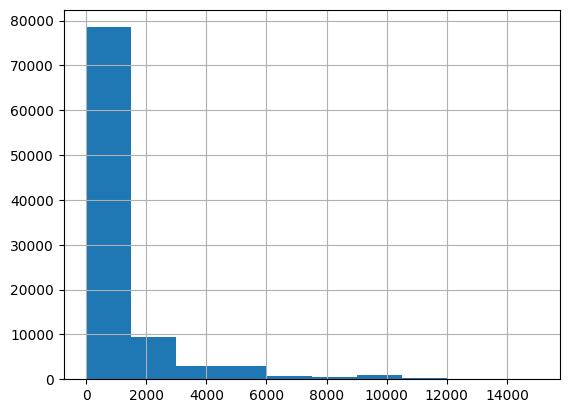

In [18]:
df['LD50'].hist(bins=10)

In [12]:
df['LD50_log'] = np.log(df['LD50'])

C:\Users\Danil\AppData\Local\Temp\ipykernel_8024\978633103.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['LD50_log'] = np.log(df['LD50'])
C:\Users\Danil\AppData\Local\Temp\ipykernel_8024\978633103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LD50_log'] = np.log(df['LD50'])


<Axes: >

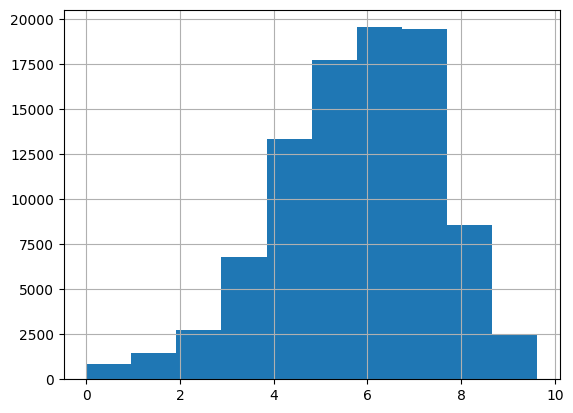

In [13]:
df['LD50_log'].hist()

In [7]:
drop_cols = ['Source', 'LD50 (a.u.)', 'LC50 (a.u.)', 'NOAEL (a.u)','Smiles', 'LC50', 'NOAEL',
              'Carcinogenicity',	'Carcinogenicity (a.u.)',	'Hepatoxicity',	'Hepatoxicity (a.u.)',
              'Eye_Corrosion',	'Eye_Corrosion (a.u.)',	'Eye_Irritation',	'Eye_Irritation (a.u.)',
              'Mutagenicity','Mutagenicity (a.u.)', 'Respiratory_Toxicity','Respiratory_Toxicity (a.u.)']
df = df.drop(drop_cols, axis=1)

In [8]:
df = pd.get_dummies(df, columns =['Exp. Animal','Method of administration'])

In [9]:
df

,LD50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,Method of administration_skin,Method of administration_subcutaneous
0,300.0,9.349040,9.349040,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,...,False,False,False,True,False,False,False,False,False,False
1,200.0,9.564163,9.564163,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,...,False,False,False,True,False,False,False,False,False,False
2,200.0,9.910675,9.910675,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,...,False,False,False,True,False,False,False,False,False,False
3,178.0,11.760965,11.760965,0.000000,-0.611197,0.625836,11.041667,419.710999,399.550995,418.051971,...,False,False,False,True,False,False,False,False,False,False
4,140.0,5.971470,5.971470,0.000000,0.000000,0.176140,11.545455,510.519989,474.231995,509.204163,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114752,4.0,12.613219,12.613219,0.107125,-2.325406,0.173524,42.046154,924.091003,850.507019,923.487854,...,False,False,False,False,True,False,False,False,False,False
114753,88.0,12.613219,12.613219,0.107125,-2.325406,0.173524,42.046154,924.091003,850.507019,923.487854,...,False,False,False,True,False,False,False,False,False,False
114754,500.0,11.376014,11.376014,0.009406,-1.407863,0.499122,76.631577,380.912994,372.848999,377.870636,...,False,False,False,False,False,True,False,False,False,False
114755,2000.0,14.351329,14.351329,0.000000,-5.319199,0.061101,32.695652,1346.376953,1256.665039,1345.567017,...,False,False,False,False,True,False,False,False,False,False


In [10]:
df = df.dropna()

In [14]:
# Отделим целевую переменную
y = df['LD50_log']
X_raw = df.drop(['LD50', 'LD50_log'], axis=1)

X_raw.shape, len(y)

((92963, 1414), 92963)

In [15]:
X_raw

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,Method of administration_skin,Method of administration_subcutaneous
0,9.349040,9.349040,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,138.0,...,False,False,False,True,False,False,False,False,False,False
1,9.564163,9.564163,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,138.0,...,False,False,False,True,False,False,False,False,False,False
2,9.910675,9.910675,0.000000,0.000000,0.692008,14.280000,476.213013,452.020996,474.026611,138.0,...,False,False,False,True,False,False,False,False,False,False
3,11.760965,11.760965,0.000000,-0.611197,0.625836,11.041667,419.710999,399.550995,418.051971,132.0,...,False,False,False,True,False,False,False,False,False,False
4,5.971470,5.971470,0.000000,0.000000,0.176140,11.545455,510.519989,474.231995,509.204163,176.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114745,15.022344,15.022344,0.036460,-1.947471,0.109538,42.500000,1085.156006,1008.547974,1084.472656,428.0,...,False,False,False,False,True,False,False,False,False,False
114752,12.613219,12.613219,0.107125,-2.325406,0.173524,42.046154,924.091003,850.507019,923.487854,368.0,...,False,False,False,False,True,False,False,False,False,False
114753,12.613219,12.613219,0.107125,-2.325406,0.173524,42.046154,924.091003,850.507019,923.487854,368.0,...,False,False,False,True,False,False,False,False,False,False
114754,11.376014,11.376014,0.009406,-1.407863,0.499122,76.631577,380.912994,372.848999,377.870636,104.0,...,False,False,False,False,False,True,False,False,False,False


Обучим нашу модель

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X_raw, y, test_size=0.25, random_state=123)

model = LinearRegression()

model.fit(Xtrain, ytrain)

pred_mse = model.predict(Xtest)
pred_mse_df = pd.DataFrame(pred_mse)
pred_mse_df.describe()

,0
count,23241.000000
mean,5.790598
std,0.000419
min,5.790595
25%,5.790595
50%,5.790595
75%,5.790595
max,5.854546


In [20]:
ytest.describe()

count    23241.000000
mean         5.804024
std          1.717289
min          0.000004
25%          4.615090
50%          5.991465
75%          6.907755
max          9.611128
Name: LD50_log, dtype: float64

(array([1.413e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+000, 1.93581782e-169, 3.87163563e-169, 5.80745345e-169,
        7.74327126e-169, 9.67908908e-169, 1.16149069e-168, 1.35507247e-168,
        1.54865425e-168, 1.74223603e-168, 1.93581782e-168]),
 <BarContainer object of 10 artists>)

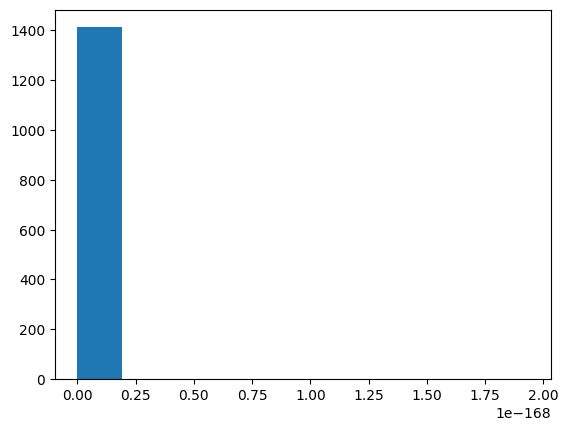

In [21]:
plt.hist(model.coef_)

In [22]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(ytest, pred_mse)
MAPE = mean_absolute_percentage_error(ytest, pred_mse)

print('MAPE: ', MAPE)
print('r2: ', r2)

MAPE:  87.41002543805742
r2:  -5.4395419358810315e-05


Масштабируем признаки

In [4]:
df2 = df_raw[df_raw['LD50'] < 15000]
df2 = df2[df2['LD50'] > 1]

drop_cols = ['Source', 'LD50 (a.u.)', 'LC50 (a.u.)', 'NOAEL (a.u)','Smiles', 'LC50', 'NOAEL',
              'Carcinogenicity',	'Carcinogenicity (a.u.)',	'Hepatoxicity',	'Hepatoxicity (a.u.)',
              'Eye_Corrosion',	'Eye_Corrosion (a.u.)',	'Eye_Irritation',	'Eye_Irritation (a.u.)',
              'Mutagenicity','Mutagenicity (a.u.)', 'Respiratory_Toxicity','Respiratory_Toxicity (a.u.)']
df2 = df2.drop(drop_cols, axis=1)
df2 = df2.dropna()

df2['LD50_log'] = np.log(df2['LD50'])

In [5]:
# Отделим целевую переменную
y2 = df2['LD50_log']
X_raw2 = df2.drop(['LD50', 'LD50_log'], axis=1)

num_cols = X_raw2.select_dtypes(include=['number']).columns
cat_cols = X_raw2.select_dtypes(include=['object']).columns
X_cat = X_raw2[cat_cols]
X_num = X_raw2[num_cols]
X_cat

,Exp. Animal,Method of administration
0,mouse,intraperitoneal
1,mouse,intraperitoneal
2,mouse,intraperitoneal
3,mouse,intraperitoneal
4,mouse,intraperitoneal
...,...,...
114745,mouse,intravenous
114752,mouse,intravenous
114753,mouse,intraperitoneal
114754,mouse,oral


In [6]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_num)
X_scaled = pd.DataFrame(data=X_real_norm_np, columns=num_cols)

In [7]:
X_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,MorganFP_1024
0,0.524964,0.524964,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.537043,0.537043,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.556501,0.556501,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.660397,0.660397,0.000000,0.581842,0.657888,0.136397,0.067755,0.068792,0.067496,0.055820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.335308,0.335308,0.000000,0.620500,0.179595,0.142620,0.082802,0.082008,0.082611,0.074859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93524,0.843529,0.843529,0.004432,0.497323,0.108758,0.525000,0.178020,0.176562,0.178003,0.183903,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93525,0.708253,0.708253,0.013023,0.473418,0.176813,0.519394,0.151331,0.148595,0.151309,0.157940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93526,0.708253,0.708253,0.013023,0.473418,0.176813,0.519394,0.151331,0.148595,0.151309,0.157940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93527,0.638782,0.638782,0.001143,0.531453,0.523117,0.946625,0.061326,0.064067,0.060834,0.043704,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
OHE = preprocessing.OneHotEncoder(handle_unknown='ignore', drop='first')
X_encoded = OHE.fit_transform(X_cat)
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=OHE.get_feature_names_out(cat_cols))

In [9]:
X_encoded

,Exp. Animal_rat,Method of administration_gavage,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,Method of administration_skin,Method of administration_subcutaneous
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93526,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X2 = pd.concat([X_scaled, X_encoded], axis=1)
X2

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Method of administration_inhalation,Method of administration_intramuscular,Method of administration_intramusculary,Method of administration_intraperitoneal,Method of administration_intravenous,Method of administration_oral,Method of administration_percutaneous,Method of administration_sc,Method of administration_skin,Method of administration_subcutaneous
0,0.524964,0.524964,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.537043,0.537043,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.556501,0.556501,0.000000,0.620500,0.728270,0.176400,0.077117,0.078077,0.076778,0.058416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.660397,0.660397,0.000000,0.581842,0.657888,0.136397,0.067755,0.068792,0.067496,0.055820,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.335308,0.335308,0.000000,0.620500,0.179595,0.142620,0.082802,0.082008,0.082611,0.074859,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93524,0.843529,0.843529,0.004432,0.497323,0.108758,0.525000,0.178020,0.176562,0.178003,0.183903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93525,0.708253,0.708253,0.013023,0.473418,0.176813,0.519394,0.151331,0.148595,0.151309,0.157940,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93526,0.708253,0.708253,0.013023,0.473418,0.176813,0.519394,0.151331,0.148595,0.151309,0.157940,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93527,0.638782,0.638782,0.001143,0.531453,0.523117,0.946625,0.061326,0.064067,0.060834,0.043704,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Обучим модель на масштабированных данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.25, random_state=123)

model = LinearRegression()
model.fit(Xtrain, ytrain)
pred_mse = model.predict(Xtest)
pred_mse_df = pd.DataFrame(pred_mse)
pred_mse_df.describe()

(array([2.000e+00, 2.000e+00, 2.000e+00, 8.000e+00, 1.250e+02, 1.256e+03,
        1.000e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([-5.95956942e+09, -4.76765553e+09, -3.57574165e+09, -2.38382777e+09,
        -1.19191388e+09, -2.80250549e-01,  1.19191388e+09,  2.38382777e+09,
         3.57574165e+09,  4.76765553e+09,  5.95956942e+09]),
 <BarContainer object of 10 artists>)

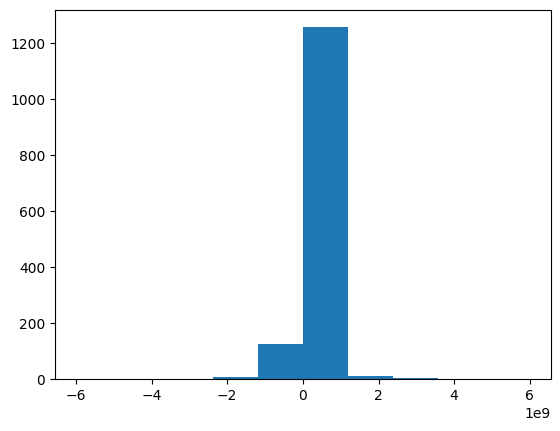

In [13]:
plt.hist(model.coef_)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(ytest, pred_mse)
MAPE = mean_absolute_percentage_error(ytest, pred_mse)

print('MAPE: ', MAPE)
print('r2: ', r2)

MAPE:  6342.2744115620235
r2:  -9420967225761.152


Определим значимость признаков

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

coefficients = []

for train_index, test_index in kf.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    coefficients.append(model.coef_)

coefficients_df = pd.DataFrame(coefficients, columns=X2.columns)

# Рассчитываем средние и стандартные отклонения коэффициентов
mean_coefficients = coefficients_df.mean()
std_coefficients = coefficients_df.std()

# Создаем DataFrame для хранения значимости признаков
importance_df = pd.DataFrame({'Признак': X2.columns, 'Средний вес': mean_coefficients, 'Стандартное отклонение': std_coefficients})

# Сортируем по абсолютному значению среднего веса
importance_df['Абсолютный средний вес'] = importance_df['Средний вес'].abs()
importance_df = importance_df.sort_values(by='Абсолютный средний вес', ascending=False)

# Выводим результаты
print("\nЗначимость признаков (средние коэффициенты):")
print(importance_df)


Значимость признаков (средние коэффициенты):
                             Признак   Средний вес  Стандартное отклонение  \
A$A!O>1(&...)          A$A!O>1(&...)  6.371542e+11            1.314174e+12   
A$A!O                          A$A!O -6.371542e+11            1.314174e+12   
MaxAbsEStateIndex  MaxAbsEStateIndex  5.832553e+11            1.618029e+12   
MaxEStateIndex        MaxEStateIndex -5.832553e+11            1.618029e+12   
EState_VSA1              EState_VSA1 -7.635327e+10            1.543592e+11   
...                              ...           ...                     ...   
MorganFP_704            MorganFP_704  7.883318e-04            5.477149e-03   
MorganFP_497            MorganFP_497  7.241289e-04            1.625660e-02   
MorganFP_46              MorganFP_46  5.636041e-04            1.629012e-02   
MorganFP_215            MorganFP_215  3.736784e-04            1.774356e-02   
C=C(Q)Q                      C=C(Q)Q -2.575936e-04            8.880176e-02   

                 

Уберем признаки с очень большими весами

In [25]:
new_importance_df = importance_df[importance_df['Абсолютный средний вес'] < 10]
selected_features = new_importance_df['Признак'].values
X_selected = X2[selected_features]
X_selected

,MolLogP,NumHAcceptors,TPSA,Chi2n,VSA_EState7,fr_phenol,NumRotatableBonds,fr_COO2,BCUT2D_LOGPHI,HallKierAlpha,...,MorganFP_969,MorganFP_805,MorganFP_319,MorganFP_41,MorganFP_424,MorganFP_704,MorganFP_497,MorganFP_46,MorganFP_215,C=C(Q)Q
0,0.407216,0.057143,0.027914,0.056091,0.426755,0.04,0.026455,0.000000,0.828787,0.845380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.407216,0.057143,0.027914,0.056125,0.426755,0.04,0.026455,0.000000,0.830489,0.845380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.407216,0.057143,0.027914,0.055798,0.426755,0.04,0.026455,0.000000,0.837934,0.845380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.385951,0.057143,0.054364,0.049853,0.435529,0.00,0.026455,0.000000,0.823843,0.833265,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.461266,0.028571,0.014593,0.083204,0.432583,0.00,0.052910,0.000000,0.824584,0.816427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93524,0.365506,0.228571,0.141808,0.214083,0.271281,0.08,0.079365,0.000000,0.869657,0.802259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93525,0.377627,0.161905,0.126531,0.173213,0.446669,0.00,0.015873,0.142857,0.854497,0.799795,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
93526,0.377627,0.161905,0.126531,0.173213,0.446669,0.00,0.015873,0.142857,0.854497,0.799795,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
93527,0.416691,0.009524,0.006758,0.065570,0.436549,0.00,0.005291,0.000000,0.955309,0.899384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Оценим нашу модель с помощью кросс-валидации

In [27]:
from sklearn.model_selection import cross_validate

# проверим на кросс-валидации значения ошибок MAPE

num_splits=5

cv_res = cross_validate(model,
                     X_selected,
                     y2,
                     scoring='neg_mean_absolute_percentage_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test MAPE errors are {-cv_res['test_score']}")

test MAPE errors are [  0.36247867   3.14785891  78.45418446 121.99200477   5.38515918]


Cреднее значение ошибки MAPE по 5 фолдам: 41.4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

Xtrain, Xtest, ytrain, ytest = train_test_split(X_selected, y2, test_size=0.25, random_state=123)

model = LinearRegression()
model.fit(Xtrain, ytrain)

pred_mse = model.predict(Xtest)
pred_mse_df = pd.DataFrame(pred_mse)

r2 = r2_score(ytest, pred_mse)
MAPE = mean_absolute_percentage_error(ytest, pred_mse)

print('MAPE: ', MAPE)
print('r2: ', r2)

MAPE:  69.00473653985944
r2:  0.3224636315456013


In [95]:
ytest_new = ytest.reset_index(0)

In [100]:
ytest_pred_df = pd.concat([ytest_new['LD50_log'], pred_mse_df[0]], axis=1)
ytest_pred_df

,LD50_log,0
0,5.828758,5.762563
1,3.806662,5.580020
2,8.281471,6.469959
3,4.882802,5.814772
4,6.907755,7.274109
...,...,...
23378,3.912040,2.150433
23379,4.356662,5.681074
23380,3.688879,5.845038
23381,4.262680,6.312304


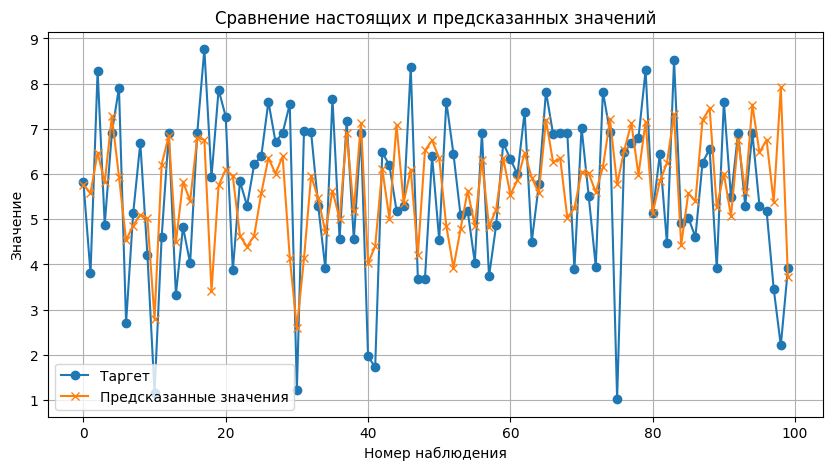

In [102]:
# Создание графика
plt.figure(figsize=(10, 5))
plt.plot(ytest_pred_df['LD50_log'][:100], label='Таргет', marker='o')
plt.plot(ytest_pred_df[0][:100], label='Предсказанные значения', marker='x')
plt.title('Сравнение настоящих и предсказанных значений')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

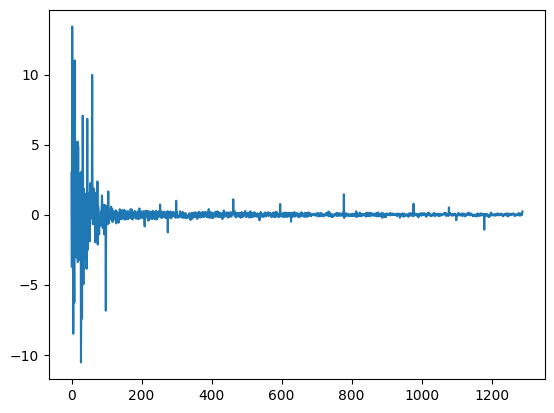

In [31]:
plt.plot(model.coef_)

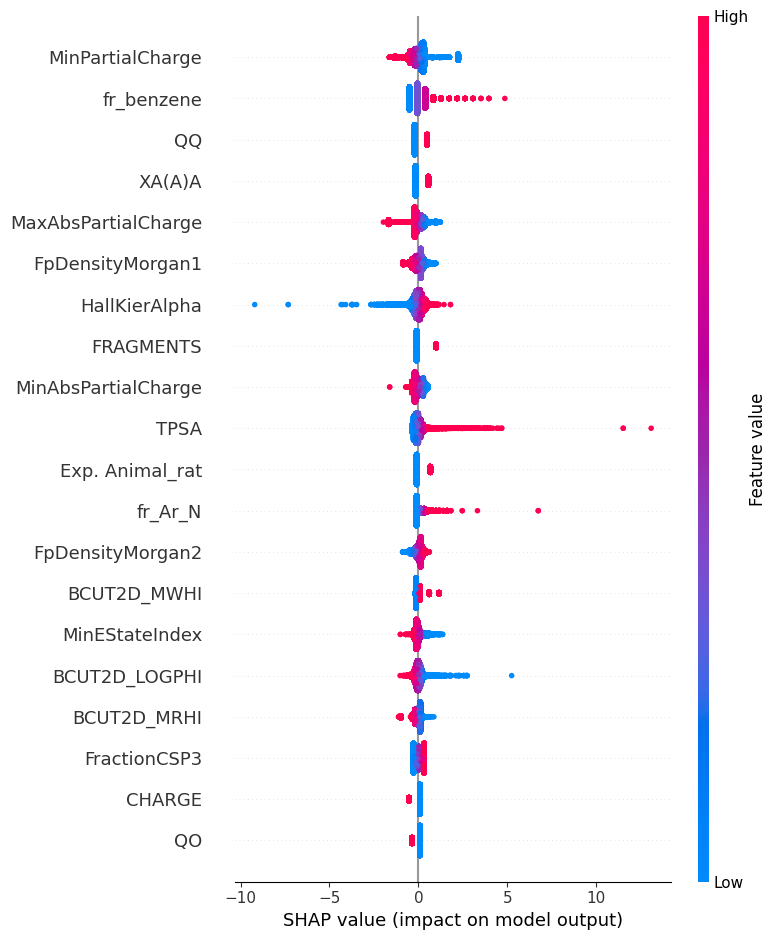

In [32]:
import shap

explainer = shap.Explainer(model, Xtrain)
shap_values = explainer(Xtrain)

shap.summary_plot(shap_values, Xtrain)

Выбросим константные признаки

In [33]:
no_unique_vals_cols = X_selected.columns[X_selected.nunique() == 1]

print("Столбцы, где нет уникальных значений:")
print(no_unique_vals_cols.tolist())

Столбцы, где нет уникальных значений:
[]


In [41]:
columns_todelete = []
for column in X_selected.columns:
    total_count = X_selected[column].count()
    most_common_count = X_selected[column].value_counts().max()
    if most_common_count / total_count >= 0.995:
        columns_todelete.append(column)

print("Столбцы, где 99,5% значений — это одно уникальное значение:")
print(columns_todelete)

X_selected2 = X_selected.drop(columns_todelete, axis=1)

Столбцы, где 99,5% значений — это одно уникальное значение:
['fr_thiocyan', 'fr_isothiocyan', 'NumRadicalElectrons', 'fr_azo', 'fr_isocyan', 'QX', 'OC(O)O', 'fr_benzodiazepine', 'SI', 'fr_azide', 'fr_tetrazole', 'fr_dihydropyridine', 'MorganFP_138', 'MorganFP_908', 'MorganFP_924', 'MorganFP_573', 'fr_diazo', 'C=C(Q)Q']


In [ ]:
from sklearn.model_selection import cross_validate

# проверим на кросс-валидации значения ошибок MAPE

num_splits=5

cv_res = cross_validate(model,
                     X_selected2,
                     y2,
                     scoring='neg_mean_absolute_percentage_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test MAPE errors are {-cv_res['test_score']}")

test MAPE errors are [  0.36293287   3.17997849  78.09861448 121.92202791   5.38193519]
